In [47]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as train
from models import Game
from utils import load_data
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

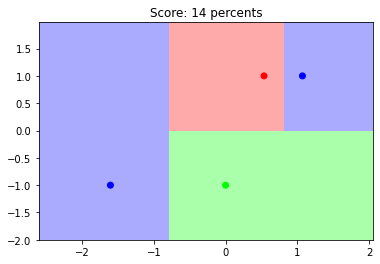

In [58]:
X, y, classes = load_data()
X_train, X_test, y_train, y_test = train(X, y, test_size=0.6)

clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
X_test

X_train_draw = scale(X_train[::, 0:2])
X_test_draw = scale(X_test[::, 0:2])

clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
clf.fit(X_train_draw, y_train)

x_min, x_max = X_train_draw[:, 0].min() - 1, X_train_draw[:, 0].max() + 1
y_min, y_max = X_train_draw[:, 1].min() - 1, X_train_draw[:, 1].max() + 1

h = 0.02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
            np.arange(y_min, y_max, h))

pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure()
plt.pcolormesh(xx, yy, pred, cmap=cmap_light)
plt.scatter(X_train_draw[:, 0], X_train_draw[:, 1], 
            c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title("Score: %.0f percents" % (clf.score(X_test_draw, y_test) * 100))
plt.show()